In [1]:
import os
import numpy as np
import random
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Directorios con las imágenes preprocesadas
train_benign_dir = 'train/Benign'
train_malignant_dir = 'train/Malignant'
test_benign_dir = 'test/Benign'
test_malignant_dir = 'test/Malignant'

# Función para cargar y procesar las imágenes
def load_images_and_labels(directory, label):
    images = []
    labels = []
    filenames = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]
    # Seleccionar aleatoriamente la mitad de las imágenes
    filenames = random.sample(filenames, len(filenames) // 2)
    for filename in filenames:
        img_path = os.path.join(directory, filename)
        try:
            img = imread(img_path, as_gray=True)  # Cargar imagen en escala de grises
            img_resized = resize(img, (128, 128))  # Redimensionar la imagen según sea necesario
            features, _ = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            images.append(features)  # Utilizar HOG como características
            labels.append(label)
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")
    return images, labels

# Cargar imágenes de entrenamiento benignas
print("Cargando imágenes de entrenamiento benignas...")
train_benign_images, train_benign_labels = load_images_and_labels(train_benign_dir, 0)
print(f"Imágenes benignas de entrenamiento cargadas: {len(train_benign_images)}")

# Cargar imágenes de entrenamiento malignas
print("Cargando imágenes de entrenamiento malignas...")
train_malignant_images, train_malignant_labels = load_images_and_labels(train_malignant_dir, 1)
print(f"Imágenes malignas de entrenamiento cargadas: {len(train_malignant_images)}")

# Cargar imágenes de prueba benignas
print("Cargando imágenes de prueba benignas...")
test_benign_images, test_benign_labels = load_images_and_labels(test_benign_dir, 0)
print(f"Imágenes benignas de prueba cargadas: {len(test_benign_images)}")

# Cargar imágenes de prueba malignas
print("Cargando imágenes de prueba malignas...")
test_malignant_images, test_malignant_labels = load_images_and_labels(test_malignant_dir, 1)
print(f"Imágenes malignas de prueba cargadas: {len(test_malignant_images)}")

# Combinar datos de entrenamiento
X_train = np.array(train_benign_images + train_malignant_images)
y_train = np.array(train_benign_labels + train_malignant_labels)

# Combinar datos de prueba
X_test = np.array(test_benign_images + test_malignant_images)
y_test = np.array(test_benign_labels + test_malignant_labels)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

# Crear el clasificador SVM con escalador
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='lineal', random_state=42))

# Entrenar el modelo SVM
print("Entrenando el modelo SVM...")
svm_classifier.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
print("Realizando predicciones en el conjunto de prueba...")
y_pred = svm_classifier.predict(X_test)

# Medir la precisión y otros métricos
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)



Cargando imágenes de entrenamiento benignas...
Imágenes benignas de entrenamiento cargadas: 3144
Cargando imágenes de entrenamiento malignas...
Imágenes malignas de entrenamiento cargadas: 2795
Cargando imágenes de prueba benignas...
Imágenes benignas de prueba cargadas: 500
Cargando imágenes de prueba malignas...
Imágenes malignas de prueba cargadas: 500
Tamaño del conjunto de entrenamiento: 5939
Tamaño del conjunto de prueba: 1000
Entrenando el modelo SVM...
Entrenamiento completado.
Realizando predicciones en el conjunto de prueba...
Accuracy: 0.767
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       500
           1       0.81      0.70      0.75       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



In [2]:
# Directorios con las imágenes preprocesadas
train_benign_dir = 'train/Benign'
train_malignant_dir = 'train/Malignant'
test_benign_dir = 'test/Benign'
test_malignant_dir = 'test/Malignant'

# Función para cargar y procesar las imágenes
def load_images_and_labels(directory, label):
    images = []
    labels = []
    filenames = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]
    # Seleccionar aleatoriamente la mitad de las imágenes
    filenames = random.sample(filenames, len(filenames) // 2)
    for filename in filenames:
        img_path = os.path.join(directory, filename)
        try:
            img = imread(img_path, as_gray=True)  # Cargar imagen en escala de grises
            img_resized = resize(img, (128, 128))  # Redimensionar la imagen según sea necesario
            features, _ = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            images.append(features)  # Utilizar HOG como características
            labels.append(label)
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")
    return images, labels

# Cargar imágenes de entrenamiento benignas
print("Cargando imágenes de entrenamiento benignas...")
train_benign_images, train_benign_labels = load_images_and_labels(train_benign_dir, 0)
print(f"Imágenes benignas de entrenamiento cargadas: {len(train_benign_images)}")

# Cargar imágenes de entrenamiento malignas
print("Cargando imágenes de entrenamiento malignas...")
train_malignant_images, train_malignant_labels = load_images_and_labels(train_malignant_dir, 1)
print(f"Imágenes malignas de entrenamiento cargadas: {len(train_malignant_images)}")

# Cargar imágenes de prueba benignas
print("Cargando imágenes de prueba benignas...")
test_benign_images, test_benign_labels = load_images_and_labels(test_benign_dir, 0)
print(f"Imágenes benignas de prueba cargadas: {len(test_benign_images)}")

# Cargar imágenes de prueba malignas
print("Cargando imágenes de prueba malignas...")
test_malignant_images, test_malignant_labels = load_images_and_labels(test_malignant_dir, 1)
print(f"Imágenes malignas de prueba cargadas: {len(test_malignant_images)}")

# Combinar datos de entrenamiento
X_train = np.array(train_benign_images + train_malignant_images)
y_train = np.array(train_benign_labels + train_malignant_labels)

# Combinar datos de prueba
X_test = np.array(test_benign_images + test_malignant_images)
y_test = np.array(test_benign_labels + test_malignant_labels)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

# Crear el clasificador SVM con escalador
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Entrenar el modelo SVM
print("Entrenando el modelo SVM...")
svm_classifier.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
print("Realizando predicciones en el conjunto de prueba...")
y_pred = svm_classifier.predict(X_test)

# Medir la precisión y otros métricos
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Cargando imágenes de entrenamiento benignas...
Imágenes benignas de entrenamiento cargadas: 3144
Cargando imágenes de entrenamiento malignas...
Imágenes malignas de entrenamiento cargadas: 2795
Cargando imágenes de prueba benignas...
Imágenes benignas de prueba cargadas: 500
Cargando imágenes de prueba malignas...
Imágenes malignas de prueba cargadas: 500
Tamaño del conjunto de entrenamiento: 5939
Tamaño del conjunto de prueba: 1000
Entrenando el modelo SVM...
Entrenamiento completado.
Realizando predicciones en el conjunto de prueba...
Accuracy: 0.811
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       500
           1       0.92      0.68      0.78       500

    accuracy                           0.81      1000
   macro avg       0.83      0.81      0.81      1000
weighted avg       0.83      0.81      0.81      1000



In [7]:
pip install opencv-python


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

import cv2
import numpy as np
from skimage import exposure
from skimage.filters import gaussian
from skimage.io import imread, imsave
from skimage.util import img_as_ubyte


In [ ]:

# Función para cargar y preprocesar una imagen
def preprocess_image(image_path):
    # Cargar la imagen
    img = imread(image_path)
    
    # Corrección de color y contraste
    img_corrected = exposure.equalize_adapthist(img, clip_limit=0.03)

    # Reducción de ruido
    img_denoised = gaussian(img_corrected, sigma=1, preserve_range=True)

    # Suavizado y mejora de contraste
    img_smoothed = cv2.GaussianBlur(img_as_ubyte(img_denoised), (5, 5), 0)
    img_enhanced = exposure.rescale_intensity(img_smoothed, in_range='image', out_range=np.uint8)

    return img_enhanced

# Directorios con las imágenes
input_dirs = ['train/Benign', 'train/Malignant', 'test/Benign', 'test/Malignant']  # Rutas a los directorios con las imágenes
output_dir = 'preprocessed'  # Ruta al directorio donde se guardarán las imágenes preprocesadas

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Procesar todas las imágenes en los directorios de entrada
for input_dir in input_dirs:
    output_subdir = os.path.join(output_dir, os.path.basename(input_dir))
    os.makedirs(output_subdir, exist_ok=True)
    
    for filename in os.listdir(input_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Filtrar solo archivos de imagen
            img_path = os.path.join(input_dir, filename)
            processed_img = preprocess_image(img_path)

            # Guardar la imagen procesada en el directorio de salida
            output_path = os.path.join(output_subdir, filename)
            imsave(output_path, processed_img)

            print(f'Imagen {filename} procesada y guardada en {output_path}')


In [8]:
import os
import numpy as np
import random
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from skimage import exposure

# Función para cargar y preprocesar una imagen
def preprocess_image(image_path):
    # Cargar la imagen
    img = imread(image_path, as_gray=True)  # Cargar la imagen en escala de grises
    
    # Corrección de color y contraste
    img_corrected = exposure.equalize_adapthist(img, clip_limit=0.03)
    
    # Reducción de ruido
    img_denoised = gaussian(img_corrected, sigma=1)
    
    # Suavizado y mejora de contraste
    img_smoothed = cv2.GaussianBlur(img_as_ubyte(img_denoised), (5, 5), 0)
    img_enhanced = exposure.rescale_intensity(img_smoothed, in_range='image', out_range=np.uint8)
    
    return img_enhanced

# Directorios con las imágenes preprocesadas
benign_dir = './preprocessed/train/Benign'
malignant_dir = './preprocessed/train/Malignant'

# Inicializar listas para las imágenes y las etiquetas
images = []
labels = []

# Cargar y procesar imágenes benignas
for filename in os.listdir(benign_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filtrar solo archivos de imagen
        img_path = os.path.join(benign_dir, filename)
        try:
            # Cargar la imagen y preprocesar
            img = preprocess_image(img_path)
            
            # Redimensionar la imagen
            img_resized = resize(img, (128, 128))
            
            # Extraer características HOG
            features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            
            images.append(features)  # Utilizar HOG como características
            labels.append(0)  # Etiqueta 0 para benignas
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")

# Cargar y procesar imágenes malignas
for filename in os.listdir(malignant_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filtrar solo archivos de imagen
        img_path = os.path.join(malignant_dir, filename)
        try:
            # Cargar la imagen y preprocesar
            img = preprocess_image(img_path)
            
            # Redimensionar la imagen
            img_resized = resize(img, (128, 128))
            
            # Extraer características HOG
            features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            
            images.append(features)  # Utilizar HOG como características
            labels.append(1)  # Etiqueta 1 para malignas
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")

# Convertir listas a arrays de numpy
X = np.array(images)
y = np.array(labels)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

# Crear el clasificador SVM con escalador
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Entrenar el modelo SVM
print("Entrenando el modelo SVM...")
svm_classifier.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
print("Realizando predicciones en el conjunto de prueba...")
y_pred = svm_classifier.predict(X_test)

# Medir la precisión y otros métricos
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Tamaño del conjunto de entrenamiento: 9503
Tamaño del conjunto de prueba: 2376
Entrenando el modelo SVM...
Entrenamiento completado.
Realizando predicciones en el conjunto de prueba...
Accuracy: 0.7861952861952862
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1263
           1       0.79      0.73      0.76      1113

    accuracy                           0.79      2376
   macro avg       0.79      0.78      0.78      2376
weighted avg       0.79      0.79      0.79      2376



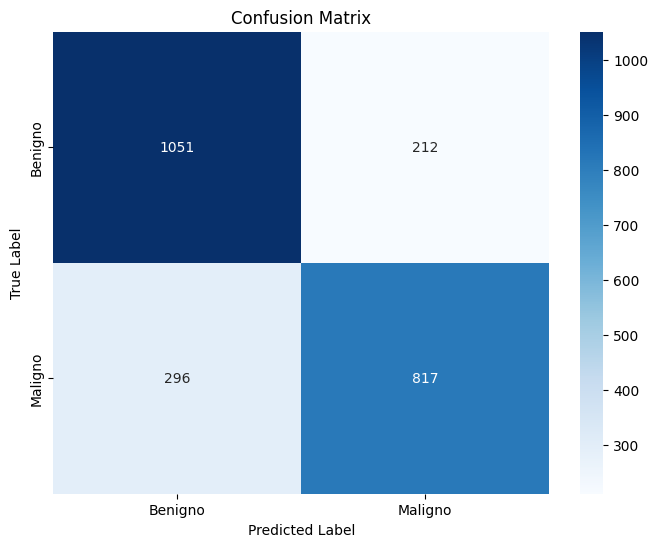

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Función para cargar y preprocesar una imagen
def preprocess_image(image_path):
    # Cargar la imagen
    img = imread(image_path, as_gray=True)  # Cargar la imagen en escala de grises
    
    # Corrección de color y contraste
    img_corrected = exposure.equalize_adapthist(img, clip_limit=0.03)
    
    # Reducción de ruido
    img_denoised = gaussian(img_corrected, sigma=1)
    
    # Suavizado y mejora de contraste
    img_smoothed = cv2.GaussianBlur(img_as_ubyte(img_denoised), (5, 5), 0)
    img_enhanced = exposure.rescale_intensity(img_smoothed, in_range='image', out_range=np.uint8)
    
    return img_enhanced

# Directorios con las imágenes preprocesadas
benign_dir = './preprocessed/train/Benign'
malignant_dir = './preprocessed/train/Malignant'

# Inicializar listas para las imágenes y las etiquetas
images = []
labels = []

# Cargar y procesar imágenes benignas
for filename in os.listdir(benign_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filtrar solo archivos de imagen
        img_path = os.path.join(benign_dir, filename)
        try:
            # Cargar la imagen y preprocesar
            img = preprocess_image(img_path)
            
            # Redimensionar la imagen
            img_resized = resize(img, (128, 128))
            
            # Extraer características HOG
            features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            
            images.append(features)  # Utilizar HOG como características
            labels.append(0)  # Etiqueta 0 para benignas
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")

# Cargar y procesar imágenes malignas
for filename in os.listdir(malignant_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filtrar solo archivos de imagen
        img_path = os.path.join(malignant_dir, filename)
        try:
            # Cargar la imagen y preprocesar
            img = preprocess_image(img_path)
            
            # Redimensionar la imagen
            img_resized = resize(img, (128, 128))
            
            # Extraer características HOG
            features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            
            images.append(features)  # Utilizar HOG como características
            labels.append(1)  # Etiqueta 1 para malignas
        except Exception as e:
            print(f"Error al cargar la imagen {img_path}: {e}")

# Convertir listas a arrays de numpy
X = np.array(images)
y = np.array(labels)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

# Crear el clasificador SVM con escalador
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))

# Entrenar el modelo SVM
print("Entrenando el modelo SVM...")
svm_classifier.fit(X_train, y_train)
print("Entrenamiento completado.")

# Predecir en el conjunto de prueba
print("Realizando predicciones en el conjunto de prueba...")
y_pred = svm_classifier.predict(X_test)

# Medir la precisión y otros métricos
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Tamaño del conjunto de entrenamiento: 9503
Tamaño del conjunto de prueba: 2376
Entrenando el modelo SVM...
Entrenamiento completado.
Realizando predicciones en el conjunto de prueba...
Accuracy: 0.7243265993265994
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1263
           1       0.70      0.71      0.71      1113

    accuracy                           0.72      2376
   macro avg       0.72      0.72      0.72      2376
weighted avg       0.72      0.72      0.72      2376



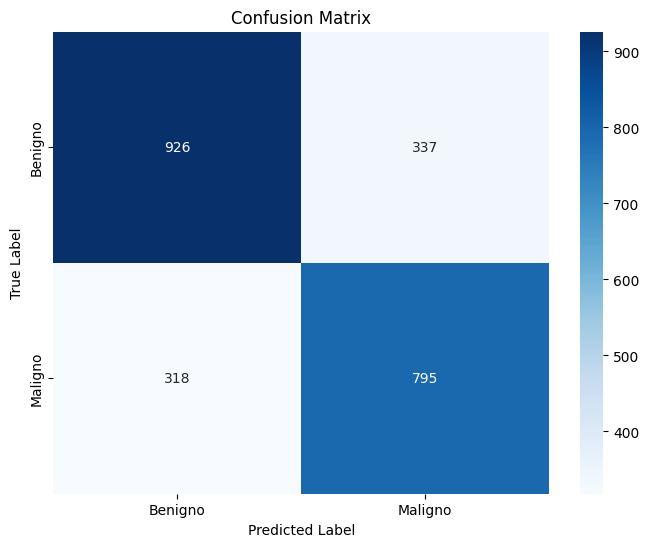

In [13]:
# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()